<a href="https://colab.research.google.com/github/KrisNguyen135/Deep-Learning-with-Google-Colab/blob/master/notebooks/Curve_fitting_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch; torch.manual_seed(0)
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

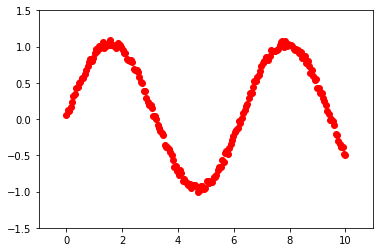

In [0]:
length = 200
x = torch.linspace(0, 10, length).reshape(length, 1)
y = torch.sin(x) + 0.1 * torch.rand(x.size())

x_plot = x.data.numpy().copy()
y_plot = y.data.numpy().copy()

plt.scatter(x_plot, y_plot, c='r')
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

In [0]:
class SingleHidden(torch.nn.Module):
    def __init__(self, n_hidden):
        super(SingleHidden, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden)
        self.relu = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden, 1)
        
    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        
        return out

In [0]:
n_epoch = 200
learning_rate = 0.01

model = SingleHidden(20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [0]:
frame = 5

predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')
    
    if epoch % frame == 0:
        predictions.append(y_preds)

Epoch 10. Loss: 0.0274
Epoch 20. Loss: 0.1198
Epoch 30. Loss: 0.1310
Epoch 40. Loss: 1.1155
Epoch 50. Loss: 0.3100
Epoch 60. Loss: 1.1332
Epoch 70. Loss: 0.3334
Epoch 80. Loss: 0.0644
Epoch 90. Loss: 0.0540
Epoch 100. Loss: 0.0975
Epoch 110. Loss: 0.0437
Epoch 120. Loss: 0.0148
Epoch 130. Loss: 0.0264
Epoch 140. Loss: 0.0085
Epoch 150. Loss: 0.0296
Epoch 160. Loss: 0.0031
Epoch 170. Loss: 0.0000
Epoch 180. Loss: 0.0006
Epoch 190. Loss: 0.0039
Epoch 200. Loss: 0.0380


In [0]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    fitted_line.set_data(x_plot, predictions[i])
    return (fitted_line,)



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epoch//frame, interval=n_epoch//frame,
                               blit=True)
rc('animation', html='jshtml')

anim

In [0]:
class DoubleHidden(torch.nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super(DoubleHidden, self).__init__()
        self.hidden1 = torch.nn.Linear(1, n_hidden1)
        self.relu1 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden2, 1)
        
    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)
        
        return out

In [0]:
n_epoch = 500
learning_rate = 0.0005

model = DoubleHidden(10, 20)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_func = torch.nn.MSELoss()

In [0]:
frame = 10

predictions = []

for epoch in range(n_epoch):
    y_preds = []
    for i in range(x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y_pred, y[i])
        y_preds.append(y_pred.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')
    
    if epoch % frame == 0:
        predictions.append(y_preds)

Epoch 10. Loss: 0.3237
Epoch 20. Loss: 0.2852
Epoch 30. Loss: 0.2583
Epoch 40. Loss: 0.2375
Epoch 50. Loss: 0.2184
Epoch 60. Loss: 0.1988
Epoch 70. Loss: 0.1781
Epoch 80. Loss: 0.1562
Epoch 90. Loss: 0.1339
Epoch 100. Loss: 0.1123
Epoch 110. Loss: 0.0922
Epoch 120. Loss: 0.0745
Epoch 130. Loss: 0.0593
Epoch 140. Loss: 0.0468
Epoch 150. Loss: 0.0361
Epoch 160. Loss: 0.0276
Epoch 170. Loss: 0.0214
Epoch 180. Loss: 0.0167
Epoch 190. Loss: 0.0131
Epoch 200. Loss: 0.0103
Epoch 210. Loss: 0.0081
Epoch 220. Loss: 0.0065
Epoch 230. Loss: 0.0052
Epoch 240. Loss: 0.0042
Epoch 250. Loss: 0.0034
Epoch 260. Loss: 0.0027
Epoch 270. Loss: 0.0022
Epoch 280. Loss: 0.0018
Epoch 290. Loss: 0.0015
Epoch 300. Loss: 0.0012
Epoch 310. Loss: 0.0010
Epoch 320. Loss: 0.0008
Epoch 330. Loss: 0.0006
Epoch 340. Loss: 0.0005
Epoch 350. Loss: 0.0004
Epoch 360. Loss: 0.0003
Epoch 370. Loss: 0.0002
Epoch 380. Loss: 0.0001
Epoch 390. Loss: 0.0001
Epoch 400. Loss: 0.0000
Epoch 410. Loss: 0.0000
Epoch 420. Loss: 0.0000
E

In [0]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

train_data, = ax.plot([], [], 'ro')
fitted_line, = ax.plot([], [], 'g-')

def init():
    train_data.set_data(x_plot, y_plot)
    return (train_data,)

def animate(i):
    fitted_line.set_data(x_plot, predictions[i])
    return (fitted_line,)



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_epoch//frame, interval=n_epoch//frame,
                               blit=True)
rc('animation', html='jshtml')

anim